In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.data.experimental import cardinality

In [4]:
(mnist_train, mnist_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [5]:
print("train samples:", cardinality(mnist_train).numpy())
print("test samples:", cardinality(mnist_test).numpy())

train samples: 60000
test samples: 10000


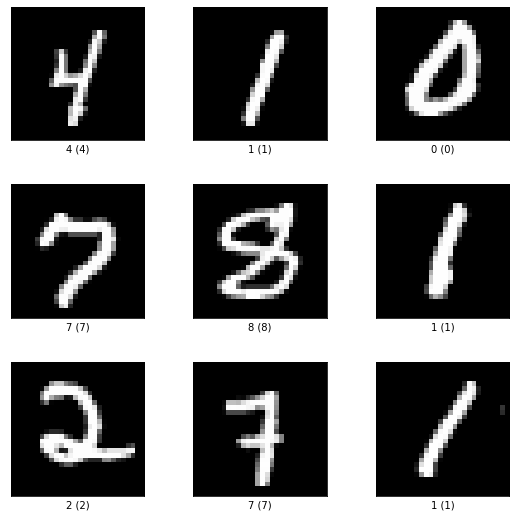

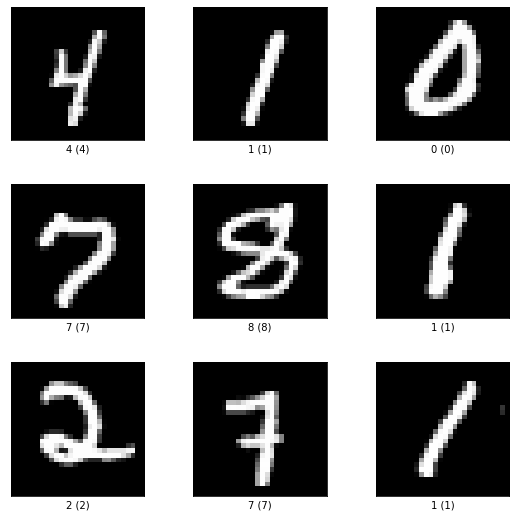

In [20]:
tfds.show_examples(mnist_train, ds_info)

In [7]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

In [8]:
shuffle = ds_info.splits['train'].num_examples

mnist_train_normalized = mnist_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE) \
    .cache()\
    .shuffle(shuffle)\
    .batch(128)\
    .prefetch(tf.data.AUTOTUNE)

In [9]:
mnist_test_normalized = mnist_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(128)\
    .cache()\
    .prefetch(tf.data.AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    mnist_train_normalized,
    epochs=6,
    validation_data=mnist_test_normalized,
)

Epoch 1/6
469/469 [==============================] - 4s 3ms/step - loss: 0.3635 - sparse_categorical_accuracy: 0.8996 - val_loss: 0.2067 - val_sparse_categorical_accuracy: 0.9419

In [18]:
prediction = model.predict(mnist_test_normalized)

In [23]:
prediction[0]
prediction[1]
prediction[2]



array([-2.7252   , -0.7436595, -3.817873 , -1.6570494, -7.1116276,
       -2.1471126, -6.170054 , -4.2652383,  6.135151 , -1.5218174],
      dtype=float32)

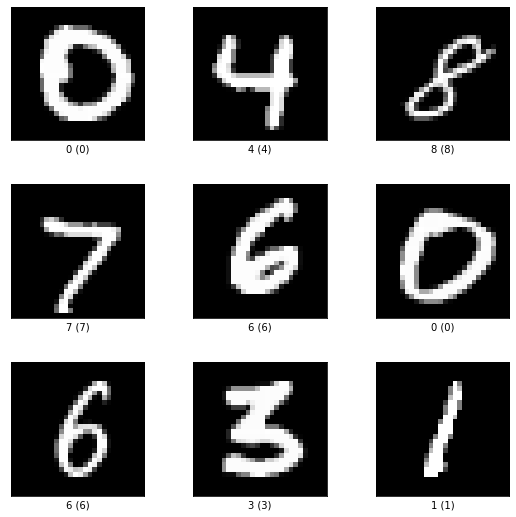

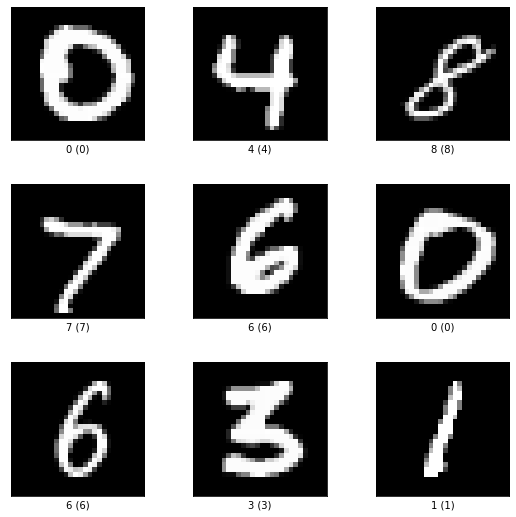

In [21]:
tfds.show_examples(mnist_test, ds_info)

